#  LU3MA201 : Projet / Travail d’étude et de recherche

#  Reconnaissance de chiﬀres manuscrits par la distance tangente

In [28]:
import scipy.io as spi
import numpy as np
import matplotlib.pyplot as plt

mat=spi.loadmat("base_apprentissage.mat")
data_app=np.transpose(mat['data'])
label_app=np.array(mat['label'])[0] #label: chiffre numérisé
label_app=label_app.astype(int) #Les labels sont stockés en flottants, on les convertit en entiers

mat = spi.loadmat("base_test.mat")
data_test = np.transpose(mat['data'])
label_test = np.array(mat['label'])[0]
label_test =label_test.astype(int)

In [30]:
label_test=label_test[:2000]

### Chargement des listes de labels pré-calculées

In [19]:
estim_x_trans = []

with open('estim_x_trans.txt', 'r') as filehandle:
    for line in filehandle:
        currentPlace = line[:-1]
        estim_x_trans.append(currentPlace)
        
estim_x_trans=[int(i) for i in estim_x_trans]

In [20]:
estim_y_trans = []

with open('estim_y_trans.txt', 'r') as filehandle:
    for line in filehandle:
        currentPlace = line[:-1]
        estim_y_trans.append(currentPlace)
        
estim_y_trans=[int(i) for i in estim_y_trans]

In [21]:
estim_rotation = []

with open('estim_rotation.txt', 'r') as filehandle:
    for line in filehandle:
        currentPlace = line[:-1]
        estim_rotation.append(currentPlace)
        
estim_rotation=[int(i) for i in estim_rotation]

In [22]:
estim_scaling = []

with open('estim_scaling.txt', 'r') as filehandle:
    for line in filehandle:
        currentPlace = line[:-1]
        estim_scaling.append(currentPlace)
        
estim_scaling=[int(i) for i in estim_scaling]

In [25]:
estim_TPH = []

with open('estim_TPH.txt', 'r') as filehandle:
    for line in filehandle:
        currentPlace = line[:-1]
        estim_TPH.append(currentPlace)
        
estim_TPH=[int(i) for i in estim_TPH]

In [26]:
estim_TDH = []

with open('estim_TDH.txt', 'r') as filehandle:
    for line in filehandle:
        currentPlace = line[:-1]
        estim_TDH.append(currentPlace)
        
estim_TDH=[int(i) for i in estim_TDH]

In [69]:
estim_thick = []

with open('estim_thick.txt', 'r') as filehandle:
    for line in filehandle:
        currentPlace = line[:-1]
        estim_thick.append(currentPlace)
        
estim_thick=[int(i) for i in estim_thick]

### Matrice de confusion

Voyons en quel autre chiffre chaque chiffre a été identifié de manière erronée

Trouvons les chiffres mal attribués à chaque chiffre et tracons le graphe représentant leurs pourcentages

In [55]:
def Liste_pourcentage_chiffres(estim_transfo): #avec estim_transfo une liste
    label_estim=np.array(estim_transfo)
    wrong_label=label_test[label_estim!=label_test]
    wrong_estim=label_estim[label_estim!=label_test]

    wrong_estimations=[]
    wrong_labels=[]
    for i in range(10):
        j=wrong_estim[wrong_label==i]
        k=wrong_label[wrong_label==i]
        wrong_estimations.append(j)
        wrong_labels.append(k)

    Values=[]
    Counts=[]
    for i in range(10):
        value, count=np.unique(wrong_estimations[i], return_counts=True)
        value=value.tolist()
        count=count.tolist()
        Values.append(value)
        Counts.append(count)
    
    pourcentage_chiffre=np.zeros(10)
    for j in range(10):
        if j in Values[0]:
            pourcentage_chiffre[j]=Counts[0][Values[0].index(j)]  
    Sum=np.sum(pourcentage_chiffre)
    for j in range(10):
        pourcentage_chiffre[j]=pourcentage_chiffre[j]/Sum
    
    Liste_pourcentage_chiffres=[]
    for i in range(10):
        pourcentage_chiffre=np.zeros(10)
        for j in range(10):
            if j in Values[i]:
                pourcentage_chiffre[j]=Counts[i][Values[i].index(j)]  
        Sum=np.sum(pourcentage_chiffre)
        for j in range(10):
            if Sum!=0:
                pourcentage_chiffre[j]=pourcentage_chiffre[j]/Sum
            
        Liste_pourcentage_chiffres.append(pourcentage_chiffre)
    
    return Liste_pourcentage_chiffres

### Tracé des histogrammes

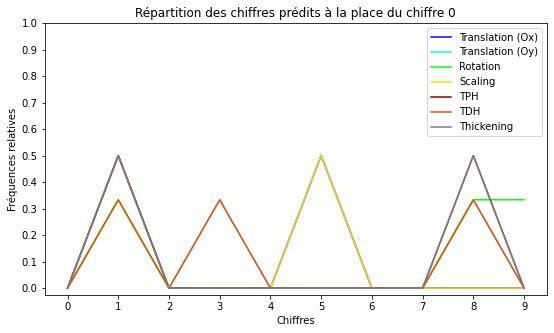

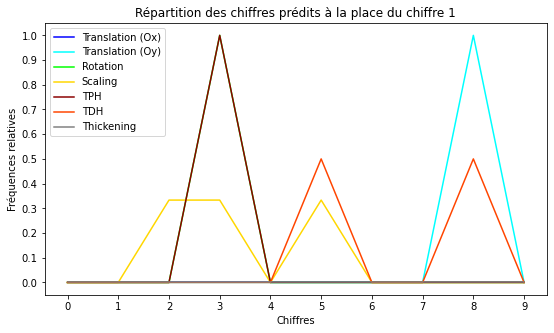

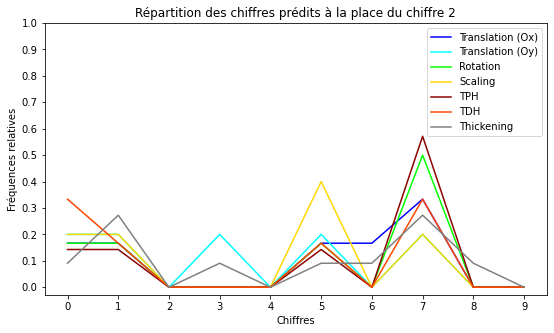

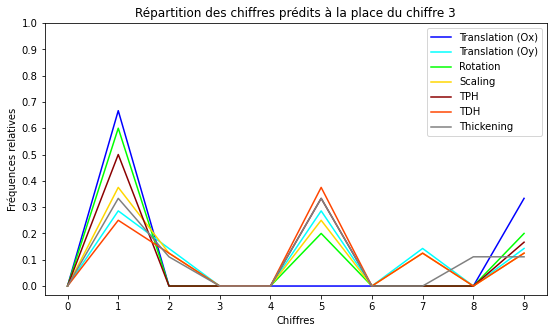

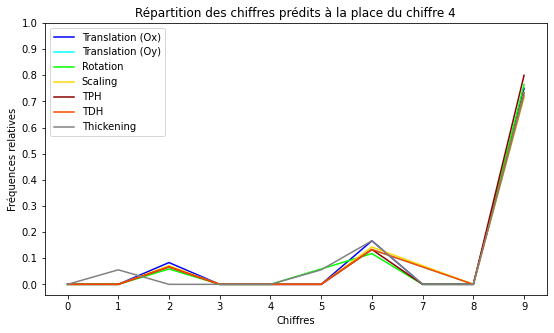

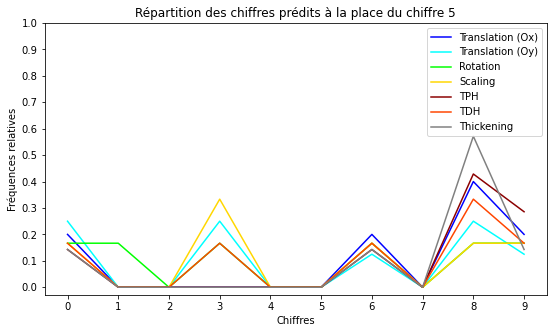

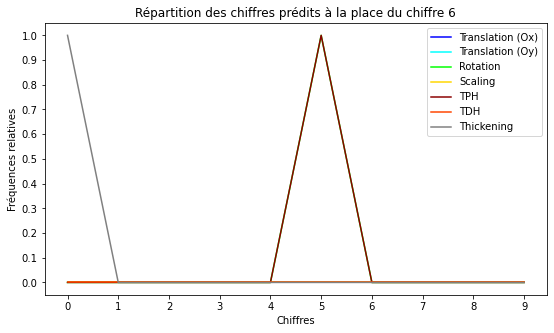

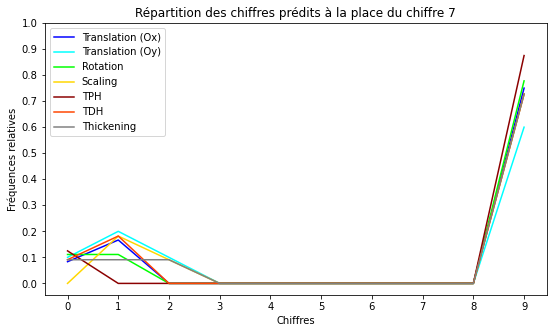

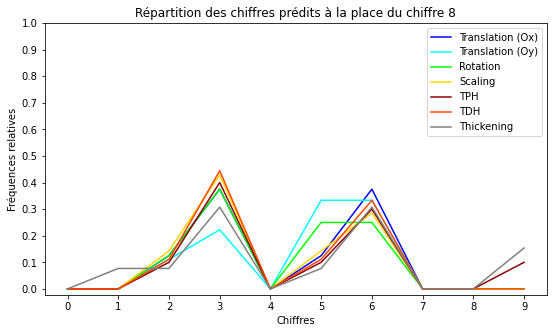

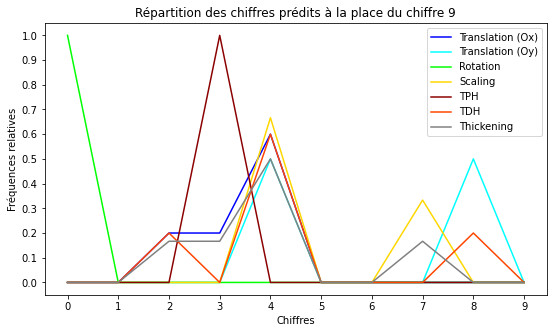

In [90]:
Chiffres=np.arange(0,10,1)
#plt.figure(figsize=(13.5,20))

for i in range(10):
    plt.figure(figsize=(9,5))
    plt.title('Répartition des chiffres prédits à la place du chiffre {}'.format(i))
    plt.plot(Chiffres,Liste_pourcentage_chiffres(estim_x_trans)[i],label='Translation (Ox)',color="blue")
    plt.plot(Chiffres,Liste_pourcentage_chiffres(estim_y_trans)[i],label='Translation (Oy)',color="cyan")
    plt.plot(Chiffres,Liste_pourcentage_chiffres(estim_rotation)[i],label='Rotation',color="lime")
    plt.plot(Chiffres,Liste_pourcentage_chiffres(estim_scaling)[i],label='Scaling',color="gold")
    plt.plot(Chiffres,Liste_pourcentage_chiffres(estim_TPH)[i],label='TPH',color="darkred")
    plt.plot(Chiffres,Liste_pourcentage_chiffres(estim_TDH)[i],label='TDH',color="orangered")
    plt.plot(Chiffres,Liste_pourcentage_chiffres(estim_thick)[i],label='Thickening',color="grey")
    plt.xticks([0,1,2,3,4,5,6,7,8,9])
    plt.yticks([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])
    plt.xlabel(r'Chiffres')
    plt.ylabel(r'Fréquences relatives')
    plt.legend()
    plt.savefig('plot {}.png'.format(i), dpi=300, bbox_inches='tight')
    plt.show()
